In [ ]:
install.packages("extRemes")
install.packages("dataRetrieval")
library(dataRetrieval)
library(extRemes)

In [2]:
siteNumbers <- c("03568000")
peakData <- readNWISpeak(siteNumbers,  startDate = "1900-01-01",
                         endDate = "2008-12-31")

In [3]:
head(peakData)

agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd
USGS,03568000,1900-02-15,NA,159000,NA,24.3,NA,NA,NA,NA,NA,NA
USGS,03568000,1901-05-25,NA,221000,NA,33.2,NA,NA,NA,NA,NA,NA
USGS,03568000,1902-01-02,NA,271000,NA,40.8,NA,NA,NA,NA,NA,NA
USGS,03568000,1903-04-11,NA,210000,NA,31.8,NA,NA,NA,NA,NA,NA
USGS,03568000,1904-03-25,NA,144000,NA,22.1,NA,NA,NA,NA,NA,NA
USGS,03568000,1905-02-11,NA,146000,NA,22.4,NA,NA,NA,NA,NA,NA


In [4]:
df=peakData['peak_va']

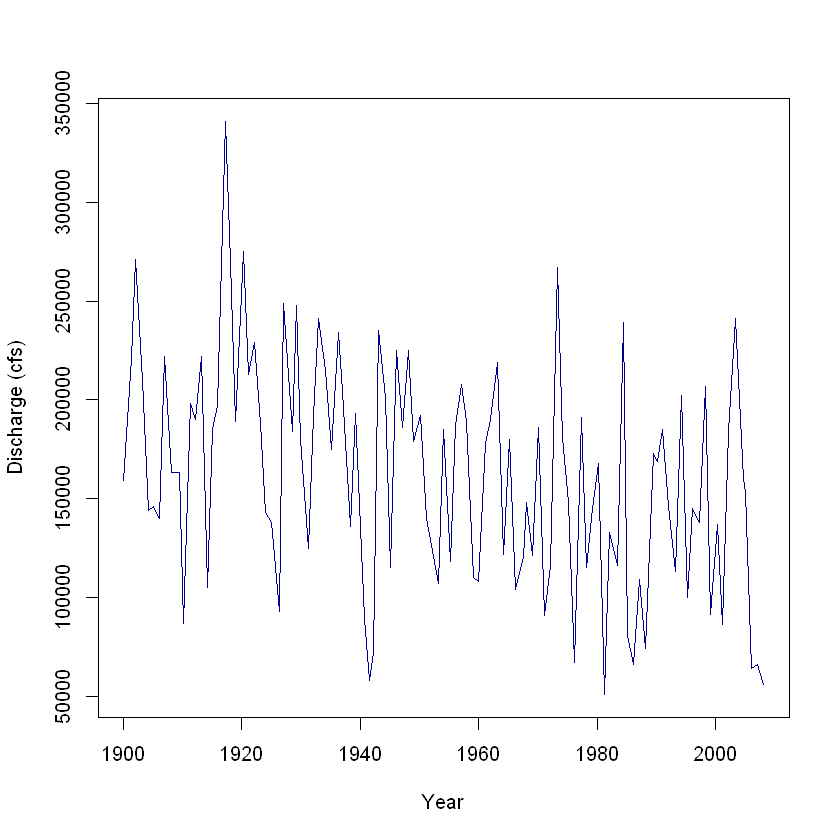

In [5]:
plot(peakData$peak_dt,df$peak_va, xlab = "Year",type="l",ylab = "Discharge (cfs)", 
col = "darkblue", bg = "lightblue", pch = 21)

In [6]:
head(df)

peak_va
159000
221000
271000
210000
144000
146000


####  Let's use Gumbel distribution type for extreme value analysis, you can use other approaches based on your need, for key words for distribution and methods please see the "extRemes" package documentation. 

In [7]:
fit <- fevd(df[['peak_va']],type = c("Gumbel"))

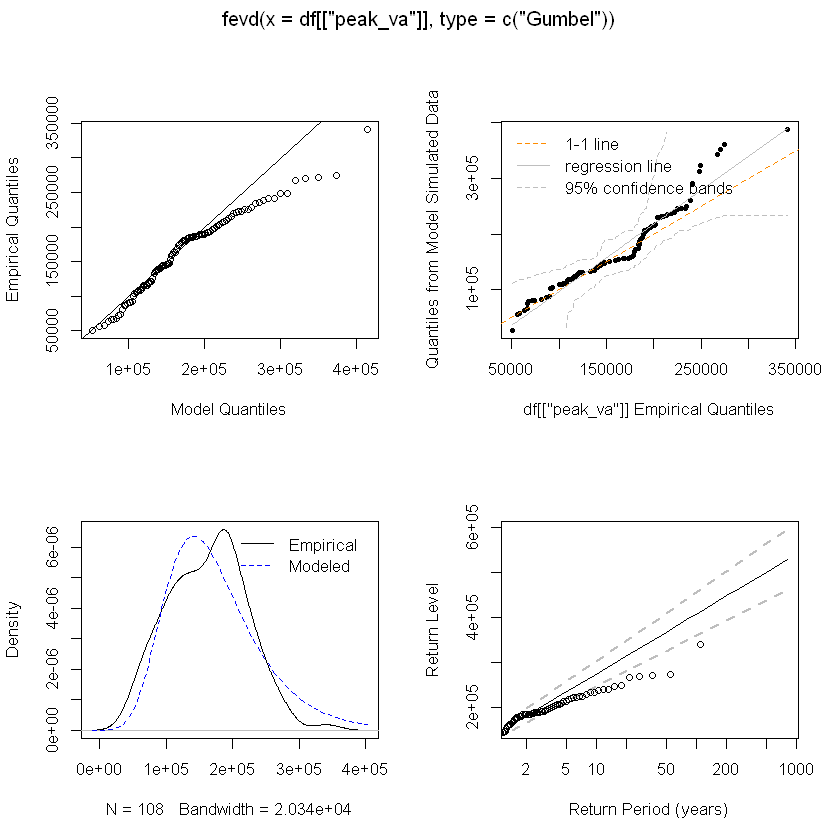

In [8]:
plot(fit)

#### Let's define return periods in a list, i.e., 5,10,20,50,100,200,300,500 years extreme values, for me values are for floods

In [9]:
ci(fit, return.period=c(5,10,20,50,100,200,300,500))

fevd(x = df[["peak_va"]], type = c("Gumbel"))

[1] "Normal Approx."

                      95% lower CI Estimate 95% upper CI
5-year return level       207185.1 228922.8     250660.5
10-year return level      244448.6 272389.2     300329.8
20-year return level      279961.7 314083.3     348204.8
50-year return level      325757.6 368051.9     410346.2
100-year return level     360002.0 408493.8     456985.6
200-year return level     394082.6 448788.2     503493.7
300-year return level     413974.3 472322.0     530669.7
500-year return level     439005.6 501948.9     564892.2


#### So, you can see a 100 year flood has a discharge value of 472322.0 cfs. I have crosscheck with Excel results and they are pretty close. 